# Optical character recognition using different machine learning models

In this recipe, you will learn how to train **KNN**- and **SVM**-based digit recognition models. It's a simple **Optical Character Recognition (OCR)** system that can be extended for other characters as well. OCR is a powerful instrument used in many practical applications for recognizing text documents, automatically reading traffic sign messages, and so on.

In this recipe, we apply a lot of different OpenCV functions to build an application for recognizing digits. We use `cv2.moment` for estimating image skew, and then normalize it with `cv2.warpAffine`. **KNN** and **SVM** models are created with the `cv2.ml.KNearest_create` and `cv2.ml.SVM_create` methods. We randomly shuffle all of the available data, and then split it into `train/test` subsets. The function `eval_model` computes the overall model accuracy and the confusion matrix. In the results, we can see that the SVM-based model gives slightly better results than the **KNN** one.

In [1]:
# Import all of the necessary modules
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib auto
%pylab inline


def print_image(header,name,np_arr,start_First=0, end_First=1, start_Second=0, end_Second=2):
    print("------  {0:-<25}    Shape{1} {2}: {3:}".format(header, np_arr.shape, name, str(np_arr.dtype)) )
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
def plt_view_image(plt,list_images,figsize=(15,6), axis="off", cmap='gray'):
    #%pylab inline
    plt.figure(figsize=figsize)
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis(axis)
        plt.title(name)
        if cmap =='gray':
            plt.imshow(img,cmap='gray' )
        else:
            plt.imshow(img )
        plot_number = plot_number + 1
    plt.show()
#help("modules")   
import sys             
print('\n'.join(sys.path))
#pip list"

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S04\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s04\env

d:\html_doc\program\opencv\packt\s04\env\lib\site-packages
d:\html_doc\program\opencv\packt\s04\env\lib\site-packages\pip-20.0.2-py3.8.egg
d:\html_doc\program\opencv\packt\s04\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s04\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s04\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s04\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython


In [2]:
# Specify a few constants
CELL_SIZE = 20
NCLASSES = 10
TRAIN_RATIO = 0.8

------  digits_img---------------    Shape(1000, 2000) digits_img: uint8
[ 0 0 0 0 0 0 0 ]


<Figure size 720x360 with 0 Axes>

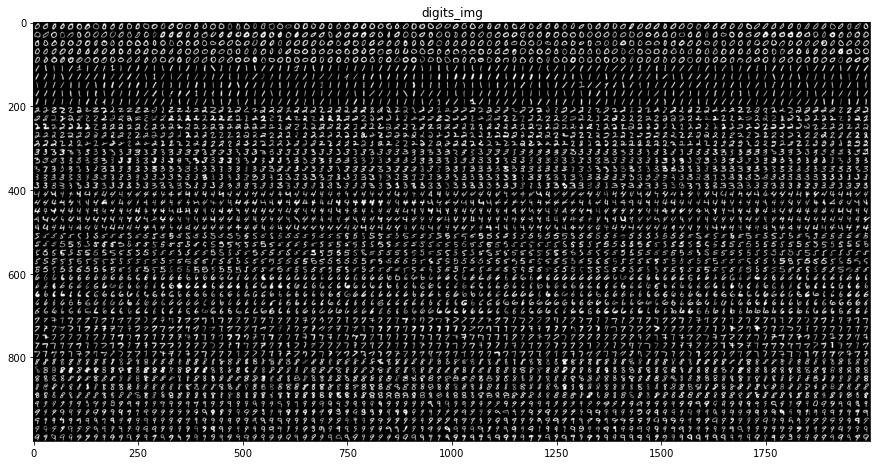

In [3]:
# Read the digits image and prepare the labels
digits_img = cv2.imread('../data/digits.png', 0)



##########################################################
print_image('digits_img','digits_img',digits_img,0,1,0,7)
plt.figure(figsize=(10,5))
plt_view_image(plt,[["digits_img",digits_img]  ], figsize=(15,8), axis='on', cmap='gray')

# Display digits image
cv2.imshow('digits_img', cv2.resize(digits_img, (960, 540)))
cv2.waitKey()
cv2.destroyAllWindows()

100 numbes * 5 == 500 each * 10 = 5000 ALL
type(digits)==500 len(digits)==5000  len(digits[0]) ==<class 'list'>  len(digits[0][0]) ==50
------  digits[0][0]-------------    Shape(20, 20) digits[0][0]: uint8
[ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 0 0 0 0 0 0 0 0 0 0 9 33 9 0 0 0 0 0 0 ]
[ 0 0 0 0 0 0 0 0 0 0 41 177 249 178 29 0 0 0 0 0 ]
[ 0 0 0 0 0 0 0 0 0 33 198 255 240 255 107 0 0 0 0 0 ]
[ 0 0 0 0 0 0 0 1 70 199 255 255 197 154 253 98 0 0 0 0 ]
[ 0 0 0 0 0 0 0 45 238 255 205 224 222 83 224 128 0 0 0 0 ]
[ 0 0 0 0 0 0 25 202 255 193 40 99 54 0 190 197 16 0 0 0 ]
[ 0 0 0 0 0 20 163 246 152 72 0 0 0 0 184 252 74 0 0 0 ]
[ 0 0 0 0 0 97 255 118 0 1 0 0 0 0 184 255 82 0 0 0 ]
[ 0 0 0 0 20 218 216 17 0 0 0 0 0 0 183 255 78 0 0 0 ]
[ 0 0 0 0 67 255 138 0 0 0 0 0 0 24 215 188 22 0 0 0 ]
[ 0 0 0 0 69 247 87 0 0 0 0 0 31 185 212 54 0 0 0 0 ]
[ 0 0 0 0 71 237 68 0 0 0 0 94 211 177 17 0 0 0 0 0 ]
[ 0 0 0 0 69 255 170 39 39 115 183 238 185 37 0

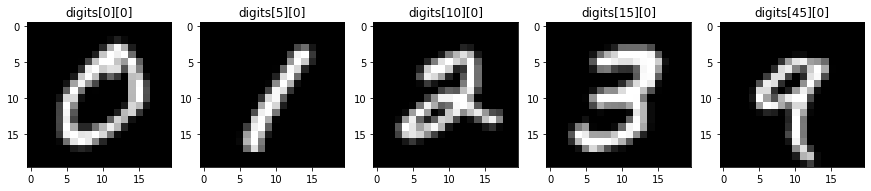

In [4]:
# Specify a few constants
#CELL_SIZE = 20
# We'll slice each digit in the image to a separate small image
digits = [np.hsplit(r, digits_img.shape[1] // CELL_SIZE) \
          for r in np.vsplit(digits_img, digits_img.shape[0] // CELL_SIZE)]



#########################################################################
print("100 numbes * 5 == {0} each * 10 = {1} ALL".format(100*5,100*5*10))
print("type(digits)=={} len(digits)=={}  len(digits[0]) =={}  len(digits[0][0]) =={}".
      format(100*5,100*5*10,type(digits),len(digits), len(digits[0] ),len(digits[0][0])) )

print_image('digits[0][0]','digits[0][0]',digits[0][0],0,20,0,20)
plt_view_image(plt,[["digits[0][0]",digits[0][0]],
                    ["digits[5][0]",digits[5][0]],
                    ["digits[10][0]",digits[10][0]],
                    ["digits[15][0]",digits[15][0]],
                    ["digits[45][0]",digits[45][0]]  ],
               figsize=(15,8), axis='on', cmap='gray'
              )

In [5]:
# Specify a few constants
#CELL_SIZE = 20
# digits contains the digit image
digits = np.array(digits).reshape(-1, CELL_SIZE, CELL_SIZE)



#########################################################################
print("100 numbes * 5 == {0} each * 10 = {1} ALL".format(100*5,100*5*10))
print("type(digits)=={} len(digits)=={}  len(digits[0]) =={}  len(digits[0][0]) =={}".
      format(100*5,100*5*10,type(digits),len(digits), len(digits[0] ),len(digits[0][0])) )
print_image('digits','digits',digits[0],0,20,0,20)

# Total digit images
Nsamples = digits.shape[0]
print('Total Digits', Nsamples)

# Specify a few constants
#NCLASSES = 10

# labels contain the digit name
labels = np.repeat(np.arange(NCLASSES), Nsamples // NCLASSES)
print('len(labels)=',len(labels),labels)

100 numbes * 5 == 500 each * 10 = 5000 ALL
type(digits)==500 len(digits)==5000  len(digits[0]) ==<class 'numpy.ndarray'>  len(digits[0][0]) ==5000
------  digits-------------------    Shape(20, 20) digits: uint8
[ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 0 0 0 0 0 0 0 0 0 0 9 33 9 0 0 0 0 0 0 ]
[ 0 0 0 0 0 0 0 0 0 0 41 177 249 178 29 0 0 0 0 0 ]
[ 0 0 0 0 0 0 0 0 0 33 198 255 240 255 107 0 0 0 0 0 ]
[ 0 0 0 0 0 0 0 1 70 199 255 255 197 154 253 98 0 0 0 0 ]
[ 0 0 0 0 0 0 0 45 238 255 205 224 222 83 224 128 0 0 0 0 ]
[ 0 0 0 0 0 0 25 202 255 193 40 99 54 0 190 197 16 0 0 0 ]
[ 0 0 0 0 0 20 163 246 152 72 0 0 0 0 184 252 74 0 0 0 ]
[ 0 0 0 0 0 97 255 118 0 1 0 0 0 0 184 255 82 0 0 0 ]
[ 0 0 0 0 20 218 216 17 0 0 0 0 0 0 183 255 78 0 0 0 ]
[ 0 0 0 0 67 255 138 0 0 0 0 0 0 24 215 188 22 0 0 0 ]
[ 0 0 0 0 69 247 87 0 0 0 0 0 31 185 212 54 0 0 0 0 ]
[ 0 0 0 0 71 237 68 0 0 0 0 94 211 177 17 0 0 0 0 0 ]
[ 0 0 0 0 69 255 170 39 39 115 183 238 185

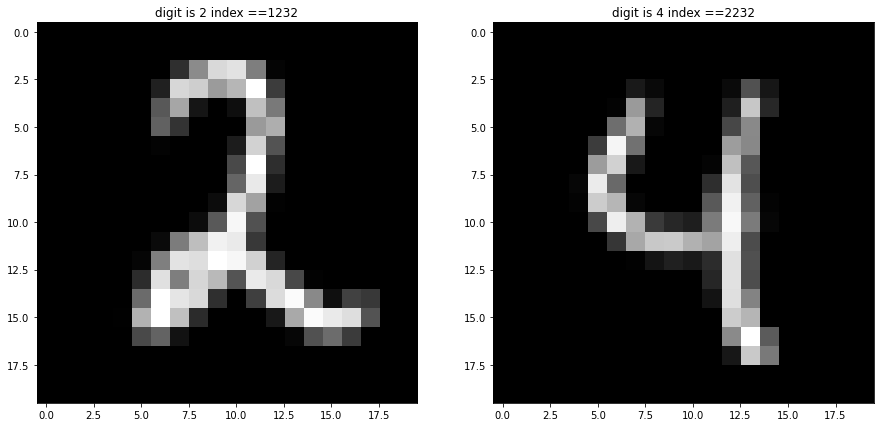

In [6]:
index = 1232

# labels contain the digit name
# digits contains the digit image
plt_view_image(plt,[['digit is {} index =={}'.format(labels[index], index),digits[index]],  
                    ['digit is {} index =={}'.format(labels[index+1000], index+1000),digits[index+1000]]],
              figsize=(15,8), axis='on', cmap='gray'
              )
cv2.imshow('digit is '+ str(labels[index]), digits[index])
cv2.waitKey()
cv2.destroyAllWindows()

# [Аффинное преобразование](https://ru.wikipedia.org/wiki/%D0%90%D1%84%D1%84%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BF%D1%80%D0%B5%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5)

Аффи́нное преобразование, иногда Афинное преобразование (от лат. affinis «соприкасающийся, близкий, смежный») — отображение плоскости или пространства в себя, при котором параллельные прямые переходят в параллельные прямые, пересекающиеся — в пересекающиеся, скрещивающиеся — в скрещивающиеся.

Примеры аффинных преобразований:
* обычное движение — фактически движение является параллельным переносом
* повороты
* растяжения или сжатия относительно прямой

__cv2.warpAffine__, который принимает три параметра 
- исходное изображения, 
- матрицу преобразования, в данном случае матрицу поворота, 
- кортеж с размерами выходного изображения. Данный метод возвращает преобразованную картинку.

__cv2.warpAffine__(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]) -> dst

* __src__ – input image.
* __dst__ –целевое изображение that has the size dsize and the same type as src .
* __M__ – матрица трансформации 2х3
* __dsize__ – size of the output image.
* __flags__ – combination of interpolation methods (see resize()) 
      CV_WARP_FILL_OUTLIERS — заполнить все пиксели целевого изображения (если пиксели отсутствуют на исходном изображени используются fillval)
      CV_WARP_INVERSE_MAP — используется обратная трансформация из dst в src
* __borderMode__ – pixel extrapolation method (see borderInterpolate()); when borderMode=BORDER_TRANSPARENT , it means that the pixels in the destination image corresponding to the “outliers” in the source image are not modified by the function.
* __borderValue__ – value used in case of a constant border; by default, it is 0.

In [7]:
digit_0 = np.copy(digits[1500])
digit_0[2,:] = 255



################################################
print_image('digits','digits',digit_0,0,20,0,20)

------  digits-------------------    Shape(20, 20) digits: uint8
[ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 ]
[ 0 0 0 0 0 0 0 0 7 33 107 108 108 110 78 0 0 0 0 0 ]
[ 0 0 0 0 0 0 19 107 177 211 255 255 255 255 245 93 0 0 0 0 ]
[ 0 0 0 0 0 0 89 255 255 239 225 224 242 253 255 206 17 0 0 0 ]
[ 0 0 0 0 0 0 25 117 123 67 49 46 98 247 255 162 4 0 0 0 ]
[ 0 0 0 0 0 0 0 0 0 0 0 0 89 251 253 95 0 0 0 0 ]
[ 0 0 0 0 0 0 0 0 0 0 42 128 218 255 236 14 0 0 0 0 ]
[ 0 0 0 0 0 0 16 93 143 142 220 255 255 196 83 2 0 0 0 0 ]
[ 0 0 0 0 0 3 150 255 255 255 255 255 254 122 0 0 0 0 0 0 ]
[ 0 0 0 0 0 0 74 171 137 134 131 165 255 183 11 0 0 0 0 0 ]
[ 0 0 0 0 0 0 0 6 0 0 0 8 230 183 11 0 0 0 0 0 ]
[ 0 0 0 0 0 17 0 0 0 0 0 100 252 182 11 0 0 0 0 0 ]
[ 0 0 0 17 124 157 3 0 0 10 105 244 255 168 8 0 0 0 0 0 ]
[ 0 0 0 88 255 237 162 161 160 200 255 248 144 35 0 0 0 0 0 0 ]
[ 0 0 0 46 186 255

------  digits-------------------    Shape(20, 20) digits: uint8
[ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 0 0 0 0 2 14 52 107 108 109 102 59 0 0 0 0 0 0 0 ]
[ 0 0 0 0 18 102 173 209 252 255 255 255 246 103 6 0 0 0 0 0 ]
[ 0 0 0 0 56 193 255 245 230 224 235 249 254 224 88 6 0 0 0 0 ]
[ 0 0 0 0 7 51 119 107 62 48 61 140 249 229 118 3 0 0 0 0 ]
[ 0 0 0 0 0 0 0 0 0 0 0 86 246 253 100 3 0 0 0 0 ]
[ 0 0 0 0 0 0 0 0 0 28 98 187 242 243 90 5 0 0 0 0 ]
[ 0 0 0 0 0 5 40 109 143 166 231 255 237 161 58 1 0 0 0 0 ]
[ 0 0 0 0 0 3 150 255 255 255 255 255 254 122 0 0 0 0 0 0 ]
[ 0 0 0 0 0 0 51 141 148 135 132 154 227 206 65 3 0 0 0 0 ]
[ 0 0 0 0 0 0 0 2 4 0 0 3 84 214 124 7 0 0 0 0 ]
[ 0 0 0 0 0 1 16 0 0 0 0 3 105 250 177 11 0 0 0 0 ]
[ 0 0 0 0 12 94 148 46 1 0 7 78 205 252 192 53 2 0 0 0 ]
[ 0 0 0 0 33 151 248 209 162 161 175 221 252 209 103 22 0 0 0 0 ]
[ 0 0 0 0 3 55 190 255 255 255 253 233 174 80 1 0 0 0

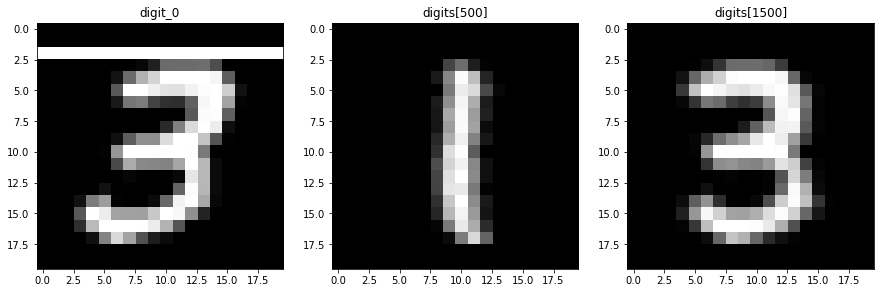

In [8]:
# S0306 Calculating image moments
#Момент изображения — это суммарная характеристика цветового пятна, представляющая собой сумму всех точек (пикселей) этого пятна.
#При этом, имеется множество подвидов моментов, характеризующие разные свойства изображения. Например, 
#   m00 -  количество всех точек, составляющих пятно. Момент нулевого порядка
#   m10 -  представляет собой сумму X координат точек. Момент первого порядка 
#   m01 — сумму Y координат. Имеются также моменты 
# m11, m20, m02, m22 и т.д. 

# Specify a few constants
#CELL_SIZE = 20
# Perform geometric normalization, 
# compute image moments, and align each sample
for i in range(Nsamples):
    m = cv2.moments(digits[i])
    if m['mu02'] > 1e-3:
        s = m['mu11'] / m['mu02']
        M = np.float32([[1, -s, 0.5*CELL_SIZE*s], [0, 1, 0]])
        digits[i] = cv2.warpAffine(digits[i], M, (CELL_SIZE, CELL_SIZE))



#####################################################
print_image('digits','digits',digits[1500],0,20,0,20)
plt_view_image(plt,[['digit_0',digit_0], 
                    ['digits[500]',digits[500]], 
                    ['digits[1500]',digits[1500]]  ],
              figsize=(15,8), axis='on', cmap='gray'
              )
#cv2.imshow('digit_0 digit[0]', digits[index])
cv2.imshow('image, detections', 
           cv2.resize(np.hstack([digit_0, digits[1500]]),(400, 200) )   )
cv2.waitKey()
cv2.destroyAllWindows()

hog_3.shape = (36, 1)
[0.17610644, 0.16946554, 0.40626404, 0.40626404, 0.40626404, 0.37085396, 0.35349217, 0.11626737, 0.40626404, 0.24454643, 0.19835615, 0.35202646, 0.13179666, 0.40387598, 0.40387598, 0.40387598, 0.32103118, 0.40387598, 0.43604597, 0.20518096, 0.06532296, 0.00898953, 0.24896654, 0.35590497, 0.43604597, 0.43604597, 0.43604597, 0.40258494, 0.40258494, 0.40258494, 0.40258494, 0.14209868, 0.055044543, 0.017561754, 0.40258494, 0.40258494] 
hog_1.shape = (36, 1)
[0.66833323, 0.23521022, 0.2043893, 0.015953187, 0.051340595, 0.0, 0.0, 0.0, 0.66833323, 0.5624722, 0.0002230596, 0.0, 0.0, 0.00457747, 0.0, 0.21269013, 0.5624722, 0.5624722, 0.5083253, 0.21909507, 0.012278856, 0.06439666, 0.10036734, 0.15913008, 0.39424172, 0.4847797, 0.5083253, 0.5803282, 0.041380905, 0.007960697, 0.058495883, 0.3129874, 0.056081805, 0.1072854, 0.45036602, 0.5803282] 


<Figure size 720x360 with 0 Axes>

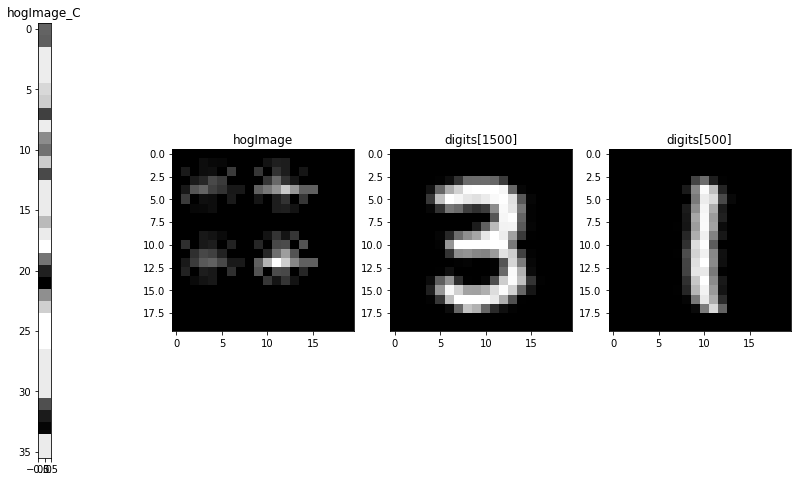

In [9]:
from skimage import exposure
from skimage import feature

win_size = (20, 20)
block_size = (10, 10)
block_stride = (10, 10)
cell_size = (10, 10)
nbins = 9
hog = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, nbins)

hog_3 = hog.compute(digits[1500])
hog_1 = hog.compute(digits[500])

hogImage_C = exposure.rescale_intensity(hog_3, out_range=(0, 255))
hogImage_C = hogImage_C.astype("uint8")


###########################################
(H, hogImage) = feature.hog(digits[1500], orientations=9, pixels_per_cell=(8, 8), 
                            cells_per_block=(2, 2), 
                            transform_sqrt=True, block_norm="L1",
                            visualize=True)
hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255))
hogImage = hogImage.astype("uint8")




##########################################
print("hog_3.shape =",hog_3.shape)
print([i[0] for i in hog_3], "\n", end="")
print("hog_1.shape =",hog_1.shape)
print([i[0] for i in hog_1], "\n", end="")

plt.figure(figsize=(10,5))
plt_view_image(plt,[['hogImage_C',hogImage_C],
                    ['hogImage',hogImage], 
                    ['digits[1500]',digits[1500]],
                    ['digits[500]',digits[500]]  ],
               figsize=(15,8), axis='on', cmap='gray'
              )

In [10]:
numpy.random.seed(42)
# Specify a few constants
#TRAIN_RATIO = 0.8
# Shuffle the samples
perm = np.random.permutation(Nsamples)
digits_rnd = np.copy(digits[perm])
labels_rnd = np.copy(labels[perm])
ntrain = int(TRAIN_RATIO * Nsamples)
ntest = Nsamples - ntrain

# [2.3. Метод бегущего окна и HOG-детектор](https://www.intuit.ru/studies/courses/10622/1106/lecture/18036?page=3)

В данном разделе рассматривается использование HOG-признаков для детектирования объектов на изображении. Однако сначала рассмотрим, каким образом можно решить задачу классификации изображений при помощи HOG-дескриптора. Пусть нам требуется определить, является ли заданное изображение изображением пешехода или нет. Другими словами, мы хотим классифицировать изображения на те, которые содержат искомый объект (пешехода), и не содержат его. Для этого, мы можем поставить в соответствие изображению его признаковое описание, полученное с помощью HOG, а затем использовать алгоритмы машинного обучения, для непосредственного осуществления классификации. Поскольку большинство алгоритмов обучения с учителем работают в пространстве признаков фиксированной размерности, вектора HOG-признаков для различных изображений должны быть одинаковой длины, а, следовательно, классифицируемые изображения должны быть одинакового размера. Более того, для обеспечения приемлемого качества решения данной задачи предполагается, что данные изображения содержат объекты одинаковых (близких) размеров, которые занимают одну и ту же область изображения.

### HOGDescriptor

```python
public HOGDescriptor()

public HOGDescriptor(Size win_size  =Size(64, 128),
                     Size block_size=Size(16, 16),
                     Size block_stride=Size(8, 8),
                     Size cell_size=Size(8, 8),
                     int nbins=9)

public HOGDescriptor(Size win_size  =Size(64, 128),
                     Size block_size=Size(16, 16),
                     Size block_stride=Size(8, 8),
                     Size cell_size=Size(8, 8),
                     int nbins=9,
                     int _derivAperture,
                     double win_sigma=DEFAULT_WIN_SIGMA,
                     int _histogramNormType,
                     double threshold_L2hys=0.2,
                     bool gamma_correction=true,
                     int nlevels=DEFAULT_NLEVELS,
                     boolean _signedGradient)
```

* __winSize__ – размер изображения, для которого требуется вычислить HOG-описание. В терминах детектора объектов это размеры бегущего окна (описание HOG-детектора, основанного на методе бегущего окна, см. ниже).
* __blockSize__ – размер блока в пикселях.
* __blockStride__ – шаг сетки блоков.
* __cellSize__ – размер ячейки в пикселях. Размер блока должен быть кратен размеру ячейки.
* __nbins__ – количество полос в гистограмме ориентации градиентов, соответствующей одной ячейке.
* __derivAperture__ – в текущей версии OpenCV реализация HOG не использует данный параметр.
* __winSigma__ – величина стандартного отклонения, определяющая гауссиан для взвешивания вкладов магнитуд градиентов в гистограммы: градиенты в пикселях, находящихся ближе к центру блока дают больший вклад. Заданное по умолчанию значение __winSigma__=-1 означает, что данное стандартное отклонение будет вычислено как $(blockSize.width + blockSize.height)/8$.
* __histogramNormType__ – определяет каким образом осуществляется нормализация вектора признаков блока. В настоящий момент поддерживается только алгоритм __HOGDescriptor::L2Hys__, который заключается в нормализации вектора по $L_2$-метрике, замене компонент полученного вектора, превышающих __L2HysThreshold__, на данное пороговое значение, и повторной нормализации по $L_2$-метрике.
* __L2HysThreshold__ – пороговое значение, используемое при нормализации HOG-описания блока. 
* __gammaCorrection__ – определяет будет ли выполнена гаммакоррекция изображения перед вычислением признаков. В случае, если __gammaCorrection=true__, интенсивность каждого пикселя обработанного изображения будет равняться корню из его исходной интенсивности.
* __nlevels__ – максимальное количество масштабов изображения, используемых при осуществлении детектирования объектов различных размеров.


### compute

Метод __compute__ класса __HOGDescriptor__ позволяет извлекать признаки всех или некоторых окон детектирования для заданного изображения:

```C++
void compute(const Mat& img, 
     vector<float>& descriptors, 
     Size winStride=Size(), 
     Size padding=Size(), 
     const vector<Point>amp; locations=vector<Point>()) const;
```

* __img__ – изображение, матрица типа CV_8UC1 или CV_8UC3. Во втором случае в каждой точке градиент вычисляется независимо по каждому каналу, и из них выбирается вектор наибольшей длины.
* __descriptors__ – вектор, в который последовательно будут записаны признаковые описания заданных окон детектирования.
* __winStride__ – шаг окна детектирования по горизонтали и вертикали. По умолчанию используется __winStride__, равный размеру ячейки HOG.
* __padding__ – размер рамки, добавляемой к изображению. Перед запуском метода бегущего окна вокруг (справа, сверху, слева, снизу) изображения может быть сгенерирована рамка, прежде всего, с целью обеспечения возможности поиска частично видимых объектов на границе изображения. Размер границы будет выровнен до размеров кратным наибольшему общему делителю шага окна детектирования и размера блока HOG по соответствующему направлению. Плюс к этому будет добавлена рамка в один пиксель, для вычисления градиента в граничных пикселях. Генерация данной рамки производится путем отражения пикселей изображения, т.е., например, если значения цвета пикселей изображения обозначить за abcdefg, то изображение с рамкой слева и справа будет выглядеть следующим образом: gfedcb|abcdefg|fedcba.
* __locations__ – положения окон детектирования, для которых требуется вычислить векторы HOG-признаков. По умолчанию признаки вычисляются для всех окон.


### setSVMDetector
В OpenCV реализован HOG-детектор, использующий в качестве классификатора машину опорных векторов с линейным ядром. Обученный линейный SVM-классификатор представляется вектором коэффициентов уравнения разделяющей гиперплоскости в пространстве признаков. Перед тем, как осуществлять детектирование необходимо с помощью метода __setSVMDetector__ задать используемую модель классификатора:

```C++
void setSVMDetector(InputArray svmdetector);
```
* __svmdetector__ – матрица-вектор, содержащая коэффициенты разделяющей гиперплоскости. Длина вектора должна либо быть на единицу больше длины HOG-дескриптора одного окна детектирования, либо равняться ей. В первом случае последним элементом svmdetector является значение свободного члена. 

Библиотека OpenCV содержит обученные для решения задачи детектирования пешеходов линейные SVM-модели, которые можно получить с помощью методов 
* __getDefaultPeopleDetector__(обучена на базе INRIA [4, 9], размер окна детектирования 64x128) 
* __getDaimlerPeopleDetector__ (обучена на базе Daimler [5, 10], размер окна детектирования 48x96).

### detect

Для непосредственного детектирования объектов фиксированного размера (т.е. без использования масштабирования изображения) служит метод __detect__:

```C++
void detect(const Mat& img, 
      vector<Point>& foundLocations, 
      vector<double>& weights, 
      double hitThreshold=0, 
      Size winStride=Size(), 
      Size padding=Size(), 
      const vector<Point>& searchLocations=vector<Point>() 
     ) const;
```
* __img__ – изображение, матрица типа CV_8UC1 или CV_8UC3 .
* __foundLocations__ – координаты верхних левых углов окон детектирования, классифицированных как содержащие объект (срабатываний детектора).
* __weights__ – веса, присвоенные классификатором срабатываниям детектора (пропорциональны расстоянию признакового вектора от разделяющей SVM-гиперплоскости). Можно трактовать данный параметр, как числовую характеристику надежности решения соответствующей задачи классификации: большие значения обозначают большую надежность.
* __hitThreshold__ – минимальное значение веса (см. параметр weights), при котором происходит срабатывание детектора.

My personal opinion is that you shouldn’t bother playing around this parameter unless you are seeing an extremely high rate of false-positive detections in your image. In that case, it might be worth trying to set this parameter. Otherwise, just let non-maxima suppression take care of any overlapping bounding boxes, as we did in the previous lesson.

* __winStride__ – шаг окна детектирования по горизонтали и вертикали.

Both winStride and scale are extremely important parameters that need to be set properly. These parameter have tremendous implications on not only the accuracy of your detector, but also the speed in which your detector runs.

At each stop of the sliding window (and for each level of the image pyramid, discussed in the scale section below), we (1) extract HOG features and (2) pass these features on to our Linear SVM for classification. The process of feature extraction and classifier decision is an expensive one, so we would prefer to evaluate as little windows as possible if our intention is to run our Python script in near real-time.

* __padding__ – размер рамки, добавляемой к изображению.

As suggested by Dalal and Triggs in their 2005 CVPR paper, Histogram of Oriented Gradients for Human Detection, adding a bit of padding surrounding the image ROI prior to HOG feature extraction and classification can actually increase the accuracy of your detector.

Typical values for padding include (8, 8), (16, 16), (24, 24), and (32, 32).

* __searchLocations__ – положения окон детектирования, по умолчанию используются все.

#### [HOG detectMultiScale parameters explained](https://www.pyimagesearch.com/2015/11/16/hog-detectmultiscale-parameters-explained/)

```python
detectMultiScale(img[, hitThreshold[, winStride[, padding[, scale[, finalThreshold[, useMeanshiftGrouping]]]]]]) -> foundLocations, foundWeights
```

### detectMultiScale

Для детектирования объектов различного размера (путем масштабирования изображения) предназначен метод __detectMultiScale__ :

```C++
void detectMultiScale(const Mat& img, 
                      vector<Rect>& foundLocations, 
                      vector<double>& foundWeights, 
                      double hitThreshold=0, 
                      Size winStride=Size(), 
                      Size padding=Size(), 
                      double scale=1.05, 
                      double finalThreshold=2.0, 
                      bool useMeanshiftGrouping=false) const; 
```                
Параметры __img, foundLocations, foundWeights, hitThreshold, winStride, padding__ по смыслу совпадают с аналогичными параметрами метода __detect__

* __scale__ – мультипликативный шаг изменения масштаба. Исходное изображение последовательно уменьшается в $1$,$scale$,$scale^2$,$...$,$scale^t$ , $...$, раз, тем самым позволяя осуществлять детектирование более мелких объектов с использованием той же SVM-модели. Масштабирование прекращается либо в том случае, когда полученное изображение хотя бы по одному измерению становится меньше окна детектирования, либо по совершению __nlevels__ (см. параметры конструктора класса __HOGDescriptor__) итераций.

Image pyramid the image is downsized and (optionally) smoothed via a Gaussian filter.
This scale parameter controls the factor in which our image is resized at each layer of the image pyramid, ultimately influencing the number of levels in the image pyramid.

* __finalThreshold__ – параметр группировки (non-maximum suppression) срабатываний детектора на всех рассматриваемых масштабах. Значение данного параметра зависит от типа используемой группировки.

* __useMeanshiftGrouping__ – параметр, определяющий использовать ли группировку методом сдвига среднего (Mean Shift), или группировку на основе разбиения на классы эквивалентности. В связи с тем, что при использовании малого шага по масштабу возможны случаи, когда объект будет продетектирован несколько раз на различных масштабах. Следует отметить, что подобная ситуация возможна и при детектировании с малыми шагами окна на одном масштабе. Для того чтобы исключить множественные срабатывания детектора на один и тот же объект применяется группировка. В случае если useMeanshiftGrouping=false выполняется разбиение множества срабатываний детектора на классы эквивалентности. Эквивалентными считаются два прямоугольника $r_1$ и $r_2$ , у которых координаты углов отличаются меньше, чем на $0.1(min(r_1.width,r_2.width)+(min(r_1.height,r_2.height))$. Затем, в классах, в которые попало больше чем __finalThreshold__ прямоугольников, вычисляются "типичные представители", путем усреднения координат углов. Полученные прямоугольники фильтруются так, чтобы исключить ситуации, когда маленький прямоугольник находится в большом. На этом фильтрация считается выполненной. Метод сдвига среднего заключается в восстановлении плотности распределения точек в трехмерном пространстве (координаты центра прямоугольника и масштаб) с помощью ядерной оценки и нахождении максимумов плотности. В результате получается набор прямоугольников соответствующих максимумам и назначенных им весов. Все прямоугольники с весом меньшим или равным __finalThreshold__ отсеиваются.

This value defaults to False  and in my opinion, should never be set to True  — use non-maxima suppression instead; you’ll get much better results.

In [11]:
# Define a function for computing HOG descriptors
def calc_hog(digits):
    win_size = (20, 20)
    block_size = (10, 10)
    block_stride = (10, 10)
    cell_size = (10, 10)
    nbins = 9
    hog = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, nbins)
    samples = []
    for d in digits: 
        samples.append(hog.compute(d))
    return np.array(samples, np.float32)

In [12]:
# Prepare the train and test data (features and labels)
hog_train = calc_hog(digits_rnd[:ntrain])
hog_test  = calc_hog(digits_rnd[ntrain:])
labels_train, labels_test = labels_rnd[:ntrain], labels_rnd[ntrain:]



##################################################################
print_image('hog_train[1234]','hog_train',hog_train[1234],0,5,0,5)
print_image('hog_train[1235]','hog_train',hog_train[1235],0,5,0,5)
print_image('hog_test','hog_test'  ,hog_test[0]    ,0,5,0,5)
print('labels_train.shape',labels_train.shape, labels_train[0])
print('labels_test.shape',labels_test.shape, labels_test[0])

------  hog_train[1234]----------    Shape(36, 1) hog_train: float32
[ 0.4555175 ]
[ 0.4555175 ]
[ 0.4555175 ]
[ 0.2551728 ]
[ 0.13424474 ]
------  hog_train[1235]----------    Shape(36, 1) hog_train: float32
[ 0.43523923 ]
[ 0.43523923 ]
[ 0.43523923 ]
[ 0.43523923 ]
[ 0.17498004 ]
------  hog_test-----------------    Shape(36, 1) hog_test: float32
[ 0.2535223 ]
[ 0.3813187 ]
[ 0.41301814 ]
[ 0.41301814 ]
[ 0.41301814 ]
labels_train.shape (4000,) 3
labels_test.shape (1000,) 3


In [13]:
#The static method creates empty KNearest classifier. It should be then trained using StatModel::train method.
# retval = cv.ml.KNearest_create()

# Create a KNN model
# K nearest neighbors is a simple algorithm that stores all items 
# and classifies new items based on a similarity measure 
# (e.g., distance functions)

K = 3
knn_model = cv2.ml.KNearest_create()

########################################################################
#Trains the statistical model.
# retval = cv.ml_StatModel.train(trainData[, flags])
# retval = cv.ml_StatModel.train(samples, layout, responses)
#   samples - training samples
#   layout - See ml::SampleTypes.
#            cv.ml.ROW_SAMPLE - each training sample is a row of samples
#            cv.ml.COL_SAMPLE - each training sample occupies a column of samples
#   responses - vector of responses associated with the training samples.

knn_model.train(hog_train, cv2.ml.ROW_SAMPLE, labels_train)

print(knn_model)

<ml_KNearest 000002524696E150>


In [14]:
# Create an SVM mode
# In machine learning, support vector machines are supervised models 
# with associated learning algorithms that analyze data used for 
# classification and regression analysis

svm_model = cv2.ml.SVM_create()
svm_model.setGamma(2)
svm_model.setC(1)
svm_model.setKernel(cv2.ml.SVM_RBF)
svm_model.setType(cv2.ml.SVM_C_SVC)
svm_model.train(hog_train, cv2.ml.ROW_SAMPLE, labels_train)

True

In [15]:
# Specify a few constants
#NCLASSES = 10
# retval, results, neighborResponses, dist = cv.ml_KNearest.findNearest()[1]
# results = cv.ml_KNearest.findNearest()[1]
# [ 3 6 4 2 1 5 0 6 6 2 5 7 9 6 6 6 0 9 0 3 4 5 4 6 1 ]
# Define a function for evaluating the models
def eval_model(fea, labels, nFunction):
    pred = nFunction(fea).astype(np.int32)
    print("pred ={} pred.shape ={}".format(type(pred),pred.shape)  )
    print_image('pred','pred',pred.T, 0,5,0,25)
    
    # Accuracy = (TP+TN)/(TP+TN+FP+FN)
    accuracy = (pred.T == labels).mean()*100
    
    confusion_matrix = np.zeros((NCLASSES, NCLASSES), np.int32)
    for c_gt, c_pred in zip(labels, pred):
        confusion_matrix[c_gt, c_pred] += 1
    
    return accuracy, confusion_matrix

In [16]:
#Finds the neighbors and predicts responses for input vectors.
# retval, results, neighborResponses, dist = cv.ml_KNearest.findNearest(samples, k[, results[, neighborResponses[, dist]]])

#   samples - Input samples stored by rows. It is a single-precision floating-point matrix of <number_of_samples> * k size.
#   k - Number of used nearest neighbors. Should be greater than 1.
#   results - Vector with results of prediction (regression or classification) for each input sample. 
#             It is a single-precision floating-point vector with <number_of_samples> elements.
#   neighborResponses - Optional output values for corresponding neighbors. 
#                       It is a single- precision floating-point matrix of <number_of_samples> * k size.
#   dist -  Optional output distances from the input vectors to the corresponding neighbors. 
#           It is a single-precision floating-point matrix of <number_of_samples> * k size.

retval, results, neighborResponses, dist = knn_model.findNearest(hog_test,3)




######################################################
print("labels_test[0] =={} dist[] =={}, retval ={}, results[] ={} neighborResponses[] ={}".format(labels_test[0], dist.shape, retval, results.shape, neighborResponses.shape) )
print("dist[0]=={}  results[0]={} neighborResponses[0]={}".format(dist[0], results[0], neighborResponses[0]))
print("hog_test[0]\n",[i[0] for i in hog_test[0]], "\n", end="")

sum_3t =0
sum_3h =0
sum_3t_3h =0
sum_1h =0
sum_3t_1h =0
sum_1t =0
sum_1t_1h =0
sum_1t_3h =0
for j in range(36):# hog_test[0].shape[0]):
    sum_3h += (hog_3[j])[0]
    sum_1h += (hog_1[j])[0]
    
    sum_3t += (hog_test[0][j])[0]
    sum_1t += (hog_test[4][j])[0]
    
    sum_3t_3h += abs( (hog_test[0][j] - hog_3[j])[0]  )
    sum_3t_1h += abs( (hog_test[0][j] - hog_1[j])[0]  )
    sum_1t_1h += abs( (hog_test[4][j] - hog_1[j])[0] )
    sum_1t_3h += abs( (hog_test[4][j] - hog_3[j])[0] )

    print("{0:.2f} == {1:.6f}-{2:.6f}   {3:.2f}=={4:.6f}-{5:.6f}   {6:.2f}=={7:.6f}-{8:.6f}  {9:.2f}=={10:.6f}-{11:.6f}".format(
         abs( (hog_test[0][j] - hog_3[j])[0] ), (hog_test[0][j])[0], (hog_3[j])[0], 
         abs( (hog_test[0][j] - hog_1[j])[0] ), (hog_test[0][j])[0], (hog_1[j])[0], 
         abs( (hog_test[4][j] - hog_1[j])[0] ), (hog_test[4][j])[0], (hog_1[j])[0], 
         abs( (hog_test[4][j] - hog_3[j])[0] ), (hog_test[4][j])[0], (hog_3[j])[0]
                                                                            ) )
    
    
    
############################################
print("sum_3t =",sum_3t) 
print("sum_3h =",sum_3h)
print("sum 3t-3h =",sum_3t_3h)
print("sum 3t-1h",sum_3t_1h)
print()
print("sum_1t=",sum_1t)
print("sum_1h=",sum_1h)
print("sum 1t-1h =",sum_1t_1h)
print("sum 1t-3h",sum_1t_3h)
print("hog_3.shape =",hog_3.shape)
print([i[0] for i in hog_3], "\n", end="")
print("hog_1.shape =",hog_1.shape)
print([i[0] for i in hog_1], "\n", end="")
#hog_test[0]
# [0.2535223, 0.3813187, 0.41301814, 0.41301814, 0.41301814, 0.2933808, 0.041324712, 0.12680957, 0.41301814, 0.368453, 0.368453, 0.34143212, 0.368453, 0.368453, 0.30363005, 0.18612848, 0.27225, 0.368453, 0.37577114, 0.37577114, 0.08842186, 0.0, 0.37577114, 0.37577114, 0.37577114, 0.37577114, 0.37577114, 0.53215027, 0.53215027, 0.29661113, 0.021352185, 0.0, 0.0, 0.002566198, 0.23810337, 0.53215027] 
#labels_test[0] == 3 (1000, 3) 3.0 (1000, 1) (1000, 3)
#[0.21441011 0.23056945 0.25311273] [3.] [3. 3. 3.]

labels_test[0] ==3 dist[] ==(1000, 3), retval =3.0, results[] =(1000, 1) neighborResponses[] =(1000, 3)
dist[0]==[0.21441011 0.23056945 0.25311273]  results[0]=[3.] neighborResponses[0]=[3. 3. 3.]
hog_test[0]
 [0.2535223, 0.3813187, 0.41301814, 0.41301814, 0.41301814, 0.2933808, 0.041324712, 0.12680957, 0.41301814, 0.368453, 0.368453, 0.34143212, 0.368453, 0.368453, 0.30363005, 0.18612848, 0.27225, 0.368453, 0.37577114, 0.37577114, 0.08842186, 0.0, 0.37577114, 0.37577114, 0.37577114, 0.37577114, 0.37577114, 0.53215027, 0.53215027, 0.29661113, 0.021352185, 0.0, 0.0, 0.002566198, 0.23810337, 0.53215027] 
0.08 == 0.253522-0.176106   0.41==0.253522-0.668333   0.01==0.679011-0.668333  0.50==0.679011-0.176106
0.21 == 0.381319-0.169466   0.15==0.381319-0.235210   0.24==0.000000-0.235210  0.17==0.000000-0.169466
0.01 == 0.413018-0.406264   0.21==0.413018-0.204389   0.14==0.063276-0.204389  0.34==0.063276-0.406264
0.01 == 0.413018-0.406264   0.40==0.413018-0.015953   0.18==0.191883-0.015953  0.

In [17]:
#Finds the neighbors and predicts responses for input vectors.
# retval, results, neighborResponses, dist = cv.ml_KNearest.findNearest(samples, k[, results[, neighborResponses[, dist]]])

#   samples - Input samples stored by rows. It is a single-precision floating-point matrix of <number_of_samples> * k size.
#   k - Number of used nearest neighbors. Should be greater than 1.
#   results - Vector with results of prediction (regression or classification) for each input sample. 
#             It is a single-precision floating-point vector with <number_of_samples> elements.
#   neighborResponses - Optional output values for corresponding neighbors. 
#                       It is a single- precision floating-point matrix of <number_of_samples> * k size.
#   dist -  Optional output distances from the input vectors to the corresponding neighbors. 
#           It is a single-precision floating-point matrix of <number_of_samples> * k size.

print("hog_test.shape =",hog_test.shape)
print("labels_test.shape  =",labels_test.shape,"\n",labels_test[:25])

hog_test.shape = (1000, 36, 1)
labels_test.shape  = (1000,) 
 [3 6 4 2 1 5 0 6 6 2 5 1 9 6 6 6 0 9 0 8 4 5 4 6 1]


Confusion matrices show how many, and what kind of mistakes a model makes. Each row corresponds to a ground truth class label, and each column corresponds to a predicted class label. All of the off-diagonal elements are classification errors, while each diagonal element is the number of proper classifications.

In [18]:
# Evaluate the KNN and SVM models
#knn_accuracy, knn_confusion_matrix = eval_model(hog_test, labels_test, lambda fea: knn_model.findNearest(fea, K)[1])
knn_accuracy, knn_confusion_matrix = \
              eval_model(hog_test, labels_test, lambda fea: knn_model.findNearest(fea, K)[1])
print('KNN accuracy (%):', knn_accuracy)
print('KNN confusion matrix:')
print(knn_confusion_matrix)

pred =<class 'numpy.ndarray'> pred.shape =(1000, 1)
------  pred---------------------    Shape(1, 1000) pred: int32
[ 3 6 4 2 1 5 0 6 6 2 5 7 9 6 6 6 0 9 0 3 4 5 4 6 1 ]
KNN accuracy (%): 92.10000000000001
KNN confusion matrix:
[[ 85   0   0   0   0   0   0   0   0   0]
 [  1 102   0   0   0   0   0   1   0   0]
 [  0   0  83   1   0   0   0   1   2   0]
 [  0   0   0  97   0   4   0   1   2   0]
 [  1   0   2   7  74   1   3   0   0   7]
 [  2   0   1   5   3 103   1   0   3   0]
 [  1   0   0   0   0   1 113   0   1   0]
 [  1   0   3   1   0   2   0  77   2   2]
 [  0   1   1   2   0   1   0   0 100   0]
 [  0   0   0   3   2   0   0   3   3  87]]


In [19]:
svm_accuracy, svm_confusion_matrix = \
              eval_model(hog_test, labels_test, lambda fea: svm_model.predict(fea)[1])
print('SVM accuracy (%):', svm_accuracy)
print('SVM confusion matrix:')
print(svm_confusion_matrix)

pred =<class 'numpy.ndarray'> pred.shape =(1000, 1)
------  pred---------------------    Shape(1, 1000) pred: int32
[ 3 6 4 2 1 5 0 6 6 2 5 7 9 6 6 6 0 9 0 0 4 5 4 6 1 ]
SVM accuracy (%): 95.3
SVM confusion matrix:
[[ 85   0   0   0   0   0   0   0   0   0]
 [  0 102   0   0   1   0   0   1   0   0]
 [  0   0  83   1   1   0   0   1   1   0]
 [  0   0   0  99   0   1   0   3   1   0]
 [  1   0   2   2  88   0   1   0   0   1]
 [  0   0   0   2   1 112   0   0   2   1]
 [  2   0   1   0   0   0 113   0   0   0]
 [  0   0   2   0   0   2   0  82   2   0]
 [  1   1   1   1   0   1   0   0 100   0]
 [  0   0   0   1   1   2   0   2   3  89]]
